In [6]:
mode = "png"

import matplotlib

font = {'family' : 'Dejavu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

import matplotlib
from matplotlib import pyplot as plt

In [7]:
import numpy as np

n = 100
Z = np.ones((n, n))
for i in range(0, int(n/2)):
    Z[int(i + n/2), i] = 3
    Z[i, int(i + n/2)] = 3
Z[0:50, 0:50] = Z[50:100, 50:100] = 2
np.fill_diagonal(Z, 0)

<AxesSubplot:title={'center':'(A) $Z$'}, xlabel='Node'>

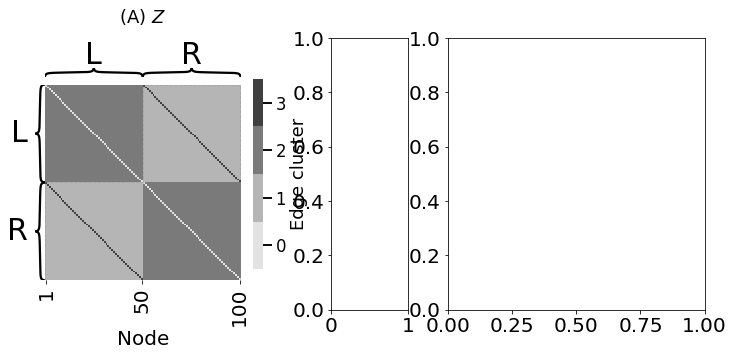

In [8]:
from graphbook_code import heatmap

fig, axs = plt.subplots(1, 3, figsize=(12, 5), gridspec_kw={"width_ratios": [1, .3, 1]})
labels = np.repeat(["L", "R"], repeats=n/2)
heatmap(Z.astype(int), title="(A) $Z$", 
        inner_hier_labels=labels, ax=axs[0], xticks=[0.5, 49.5, 99.5],
        xticklabels=[1, 50, 100], xtitle="Node", legend_title="Edge cluster")

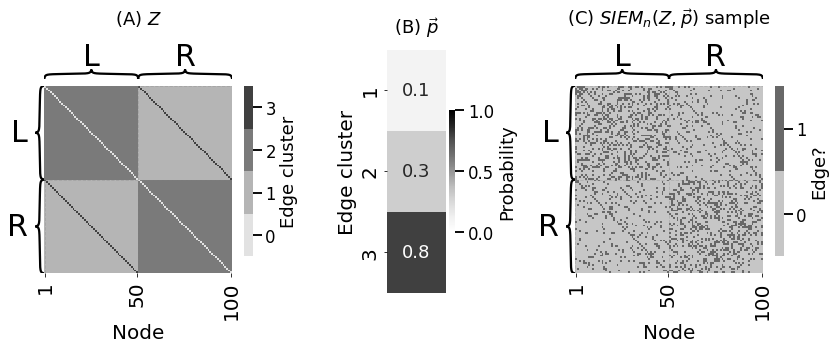

In [9]:

from graphbook_code import siem, plot_vector

p = np.array([0.1, 0.3, 0.8])
A = siem(n, p, Z)

plot_vector(p, annot=True, title="(B) $\\vec p$",
            ticks=[0.5, 1.5, 2.5], ticktitle="Edge cluster", legend_title="Probability",
            ticklabels=[1,2,3], vmin=0, vmax=1, ax=axs[1])
heatmap(A.astype(int), title="(C) $SIEM_n(Z, \\vec p)$ sample", 
        inner_hier_labels=labels, ax=axs[2], xticks=[0.5, 49.5, 99.5],
        xticklabels=[1, 50, 100], xtitle="Node", legend_title="Edge?")

fig.tight_layout()
fig.savefig("Figures/siem.{}".format(mode))
fig